In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pickle
import os
from datetime import datetime
import json



In [4]:
# Configuration des chemins et paramètres
dataset_path = 'datasets/travel_destinations_dataset.csv' 
model_dir = 'models'
n_neighbors = 10
n_clusters = 5

feature_columns = [
    'budget_per_day_usd', 'avg_temperature',
    'beach', 'mountain', 'culture', 'adventure',
    'nightlife', 'shopping', 'nature', 'historical',
    'family_friendly', 'romantic', 'safety_score'
]


In [5]:
destinations_data = pd.read_csv(dataset_path)
n_destinations = len(destinations_data)
destinations_data.head() # Affiche les 5 premières lignes

,destination_id,city,country,continent,avg_temperature,budget_per_day_usd,beach,mountain,culture,adventure,...,visa_required,climate_type,best_season_start,best_season_end,popularity_score,average_rating,number_of_reviews,cost_level,tourist_density,created_at
0,1,Paris,France,Europe,17.0,870.78,0.12,0.14,0.55,0.74,...,1,Tempéré,8,1,9.0,3.5,1357,Low,Very High,2026-01-27 22:10:12
1,2,Londres,Royaume-Uni,Europe,12.8,1215.31,0.38,0.10,0.69,0.36,...,1,Désertique,4,7,5.2,3.8,2420,Medium,Low,2026-01-27 22:10:12
2,3,New York,États-Unis,Amérique du Nord,25.4,690.06,0.23,0.33,0.38,0.36,...,1,Océanique,12,4,8.4,4.8,508,Low,Medium,2026-01-27 22:10:12
3,4,Tokyo,Japon,Asie,29.5,2802.33,0.07,0.91,0.58,0.72,...,1,Désertique,7,12,6.1,5.0,4224,High,Very High,2026-01-27 22:10:12
4,5,Barcelone,Espagne,Europe,9.3,930.55,0.08,0.16,0.84,0.60,...,1,Subtropical,11,4,5.6,4.2,3766,Low,Low,2026-01-27 22:10:12


In [6]:

# Extraction des valeurs numériques
X = destinations_data[feature_columns].values
print(f"✓ Features extraites: {X.shape}")

# Normalisation (Z-score scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


✓ Features extraites: (100, 13)


✓ Modèles entraînés avec succès.


<Axes: title={'center': 'Nombre de destinations par cluster'}, xlabel='cluster'>

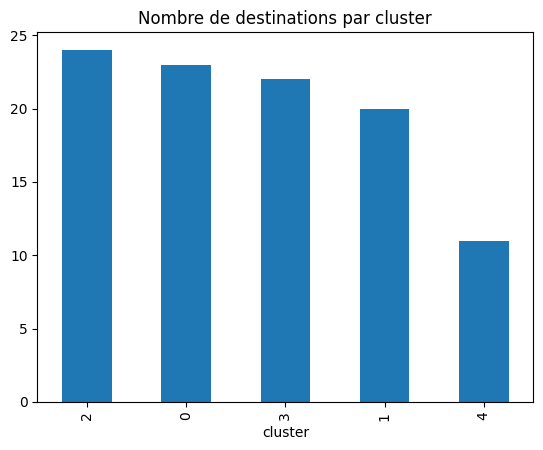

In [7]:
# --- Entraînement K-NN ---
actual_n_neighbors = min(n_neighbors, len(X_scaled))

knn_model = NearestNeighbors(
    n_neighbors=actual_n_neighbors,
    metric='euclidean',
    algorithm='auto',
    n_jobs=-1
)
knn_model.fit(X_scaled)

# --- Entraînement K-Means ---
kmeans_model = KMeans(
    n_clusters=n_clusters,
    random_state=42,
    n_init=10,
    max_iter=300
)

destinations_data['cluster'] = kmeans_model.fit_predict(X_scaled)

print(f"✓ Modèles entraînés avec succès.")
# Visualisation de la répartition
destinations_data['cluster'].value_counts().plot(kind='bar', title='Nombre de destinations par cluster')

In [9]:
os.makedirs(model_dir, exist_ok=True)

# 1. Le package complet
model_package = {
    'knn_model': knn_model,
    'kmeans_model': kmeans_model,
    'scaler': scaler,
    'feature_columns': feature_columns,
    'destinations_data': destinations_data,
    
}

model_path = os.path.join(model_dir, 'travel_knn_model.pkl')
with open(model_path, 'wb') as f:
    pickle.dump(model_package, f, protocol=pickle.HIGHEST_PROTOCOL)
